In [1]:
import os
import sys

# Get the current working directory (where the notebook is located)
notebook_dir = os.getcwd()

# Navigate to the parent directory
parent_dir = os.path.dirname(notebook_dir)

# Add the parent directory to the Python path
sys.path.append(parent_dir)

from Agents.Feedback_Agent import FeedbackAgent
from Feedback.Feedback_FileHandler import FeedbackFileHandler
import matplotlib.pyplot as plt
import numpy as np
import gymnasium as gym

In [2]:
env_name = 'CliffWalking-v0'
#env_name = "FrozenLake-v1"
learning_rate = 0.1
discount = 0.4
epsilon = 1
epsilon_decay = 0.001
num_episodes = 1000
num_q_updates = 5
max_steps_per_episode = 50
batches = 15
feedback_variants = ['IBF', 'ABF', 'ERF', 'SRF']
feedback_var = feedback_variants[0]

const_delay = 5
const_noise = 0.1

start_state = 36 # Cliff_walking
#start_state = 0 # Frozenlake
optimal_val = -13 # Cliff_waling
#optimal_val = 1 # Frozenlake

env = gym.make(env_name)
goal_state = (3,11) # cliffwalking
#goal_state = (3,3) # frozenlake

file_path = os.path.join(parent_dir, rf"Feedback\{env_name}_feedback.txt")

feedback_filehandler = FeedbackFileHandler(file_path)
feedback = feedback_filehandler.load_dict_from_file()

# Plot of changing Noise with constant Delay

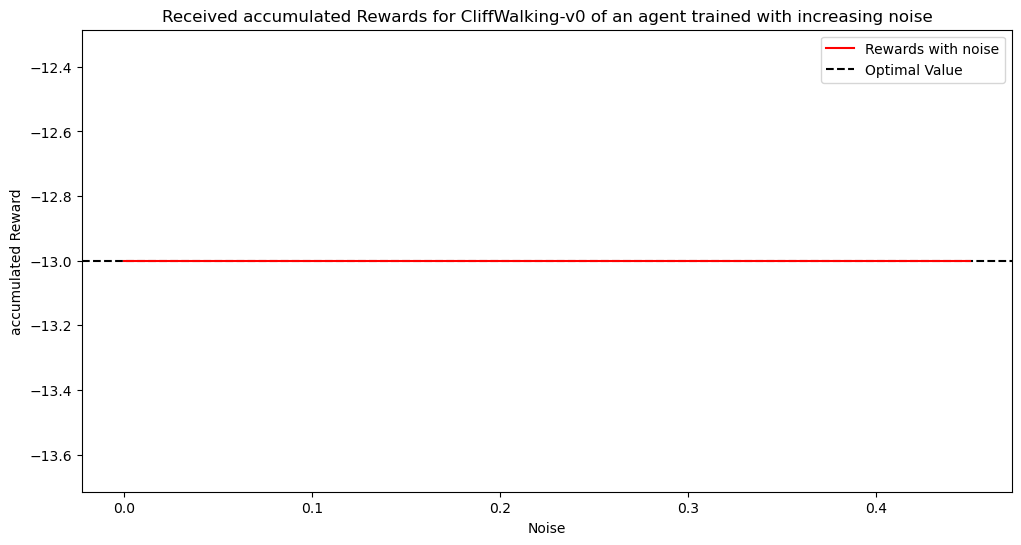

In [3]:

noise_levels = np.arange(0, 0.5, 0.05)

all_received_rewards = []

for noise in noise_levels:
    agent = FeedbackAgent(env_name, feedback, learning_rate, discount, epsilon, epsilon_decay, max_steps_per_episode,
                      num_episodes, num_q_updates, noise, const_delay, batches, feedback_var)
    feedback_q_table, true_rewards_all_episodes, rm_rewards_all_episodes = agent.feedback_learning()
    reward = agent.get_training_result()
    all_received_rewards.append(reward)


plt.figure(figsize=(12, 6))
plt.plot(noise_levels, all_received_rewards, color = 'red', label='Rewards with noise', zorder=2)
plt.axhline(y=optimal_val, color='black', linestyle='--', label='Optimal Value', zorder=1)
plt.xlabel('Noise')
plt.ylabel('accumulated Reward')
plt.title('Received accumulated Rewards for ' +env_name + ' of an agent trained with increasing noise')
plt.legend()
plt.show()


# Plot for changing Delay with constant Noise

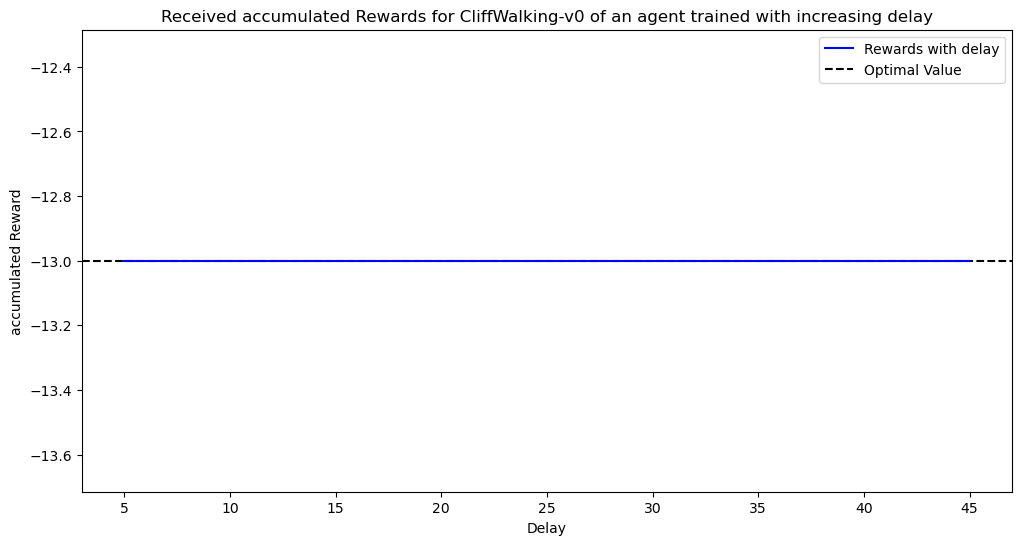

In [4]:
delay_levels = np.arange(5, 50, 5)

all_received_rewards = []

for delay in delay_levels:
    agent = FeedbackAgent(env_name, feedback, learning_rate, discount, epsilon, epsilon_decay, max_steps_per_episode,
                      num_episodes, num_q_updates, const_noise, int(delay), batches, feedback_var)
    feedback_q_table, true_rewards_all_episodes, rm_rewards_all_episodes = agent.feedback_learning()
    reward = agent.get_training_result()
    all_received_rewards.append(reward)


plt.figure(figsize=(12, 6))
plt.plot(delay_levels, all_received_rewards, color = 'blue', label='Rewards with delay',zorder=2)
plt.axhline(y=optimal_val, color='black', linestyle='--', label='Optimal Value',zorder=1)
plt.xlabel('Delay')
plt.ylabel('accumulated Reward')
plt.title('Received accumulated Rewards for ' +env_name + ' of an agent trained with increasing delay')
plt.legend()
plt.show()
